<a href="https://colab.research.google.com/github/MedeTaichan/pjsekai-ad-gen/blob/main/pjsekai_ad_gen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ご案内
こちらは、はるくんさんの「pjsekai-ad-gen」をGoogle Colab上で動くようにしたものです  
まずは下のコードの左にある [　] のところに触れると出る「▶」（再生ボタン）を押してください

停止マークが再生ボタンに戻り、緑のチェックマークが出てきたら、初期設定は完了ですので次に進んでください  
※エラーとなった場合でもおそらく大丈夫だと思いますので次に進んでください

In [ ]:
# なんかあれのまま背景生成使えなかったからこれでいかせて
!apt install wine
!wget https://github.com/sevenc-nanashi/pjsekai-background-gen-rust/releases/download/v0.1.0/pjsekai-background-gen.exe
import io
import zipfile
import urllib.request
with (
    urllib.request.urlopen("https://github.com/Hallkun19/pjsekai-ad-gen/archive/refs/heads/main.zip") as res,
    io.BytesIO(res.read()) as bytes_io,
    zipfile.ZipFile(bytes_io) as zip,
):
    zip.extractall(".")
import shutil
idou = shutil.move('pjsekai-ad-gen-main/resource', '.')

## ジャケットのアップロードをしよう

### PCやiPad等の場合
この画面の左側に6つのアイコンがあります  
その中で一番下のアイコン（ファイルマークのやつ）を押してください
### 左側に6つのアイコンが表示されないスマホ等の場合
左上の3本線から「ファイルブラウザを表示」を押してください

ファイル内のフォルダが色々あるところの上に4つのアイコンがあります  
その中の一番左のアイコン（ファイルマークに↑がついてるやつ）を押して、ファイルを開く画面が出てきたらジャケット画像を選んでアップロードしてください

もしくは、そのジャケットファイルをファイル欄にドラッグ＆ドロップしてアップロードすることもできます

**（警告が表示されてもOKして続けてください）**

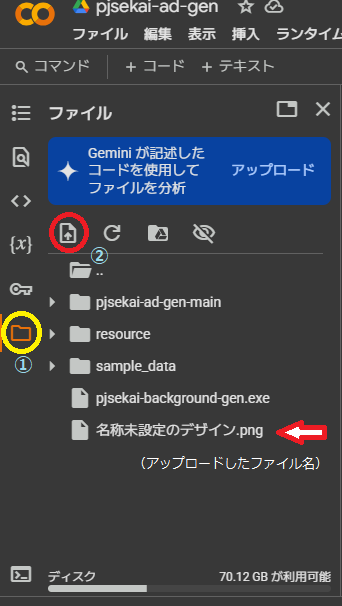

そしてアップロードしたジャケット画像のファイル名を拡張子（.pngや.jpgなど）つきでコピーしておいてください

## 情報を入力して実行しよう
下の右側に入力ボックスがありますので、最初のジャケットのパスに先ほどコピーしたジャケットのファイル名を貼り付けてください  
他、タイトルや作詞曲者、編曲者や歌手は自分で入力してください

入力し終えたら左のコードの▶（再生マーク）を押して実行してください

再生マークのボタンになり緑のチェックマークが表示されたら生成が完了しています

## 生成された画像をダウンロードしよう
先程の画面左側（スマホ等の方は左上の三本線からファイルブラウザを表示）のファイルに「result.png」が生成されていますので、そのファイルの右側の...から「ダウンロード」を押して保存してください

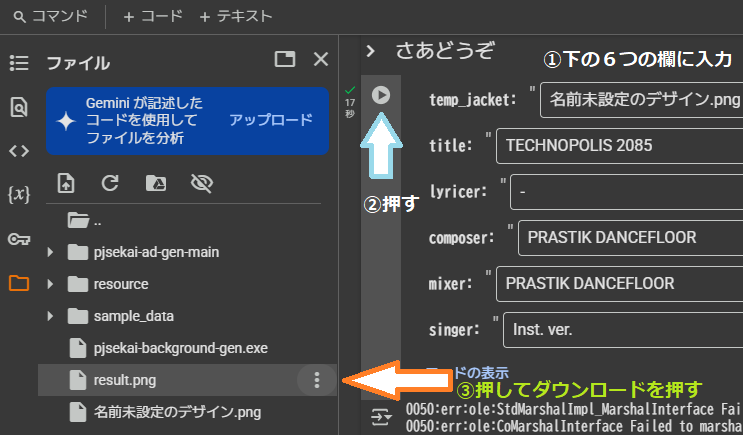

（result.pngが見つからない場合は先程のファイルアップロードアイコンの隣りにある右向き丸矢印の更新ボタンを押してください）

In [ ]:
# @title 手順に従ってやってみよう
temp_jacket = "" # @param {"type":"string","placeholder":"ジャケットのパスを入力してください"}
title = "" # @param {"type":"string","placeholder":"楽曲のタイトルを入力してください"}
a = ""
lyricer = "" # @param {"type":"string","placeholder":"作詞者を入力してください"}
composer = "" # @param {"type":"string","placeholder":"作曲者を入力してください"}
mixer = "" # @param {"type":"string","placeholder":"編曲者を入力してください"}
singer = "" # @param {"type":"string","placeholder":"歌手を入力してください"}
!wine pjsekai-background-gen.exe resource/resize_jacket.png -o resource/resize_jacket.output.png
from PIL import Image, ImageDraw, ImageFont
import subprocess
import os
import urllib.request

#テキスト下準備
CYAN = "\033[36m"
BLUE = "\033[34m"
MAGENTA = "\033[31m"
WHITE = "\033[37m"
RESET = "\033[0m"

#テキスト
print(CYAN + "== プロセカ風宣伝画像ジェネレーター --------------------------------")
print("")
print(WHITE + "    制作:" + CYAN + "はるくん (@halkun19)")
print("    バージョン:" + CYAN + "0.1.0" + RESET)
print("")
print("    pjsekai-background-gen:" + CYAN + "名無し。(@sevenc_nanashi)" + RESET)
print("")
print("    初めて作ったツールのため、平気でバグがあると思うので")
print("    見つけた場合はスレッドなどで教えていただけるとありがたいです")
print("")
print(CYAN + "--------------------------------------------------------------------" + RESET)
print("")

#下準備
if os.path.isfile("resource/template.png") == False:
    print("初回処理中...")
    os.makedirs("resource/font/")
    urllib.request.urlretrieve("https://raw.githubusercontent.com/Hallkun19/pjsekai-ad-gen/main/resource/template.png", "resource/template.png")
    urllib.request.urlretrieve("https://github.com/Hallkun19/pjsekai-ad-gen/raw/main/resource/font/bold.ttf", "resource/font/bold.ttf")
    urllib.request.urlretrieve("https://github.com/Hallkun19/pjsekai-ad-gen/raw/main/resource/font/thin.ttf", "resource/font/thin.ttf")
    urllib.request.urlretrieve("https://github.com/sevenc-nanashi/pjsekai-background-gen-rust/releases/download/v0.1.0/pjsekai-background-gen.exe", "pjsekai-background-gen-by-nanashi.exe")
    print("完了")
    print("")
    print(CYAN + "--------------------------------------------------------------------" + RESET)
    print("")

cover_img = Image.open("resource/template.png")

title_font = ImageFont.truetype('resource/font/bold.ttf', 100)
composer_font = ImageFont.truetype('resource/font/thin.ttf', 48)
singer_font = ImageFont.truetype('resource/font/thin.ttf', 38)



print("")
print(CYAN + "--------------------------------------------------------------------" + RESET)
print("")
print("画像生成中...")

temp_jacket = temp_jacket.replace("\"", "")
jacket_path = temp_jacket.replace("'", "")

#subprocess有効化（以下コピペ）
def subprocess_args(include_stdout=True):
    # The following is true only on Windows.
    if hasattr(subprocess, 'STARTUPINFO'):
        # Windowsでは、PyInstallerから「--noconsole」オプションを指定して実行すると、
        # サブプロセス呼び出しはデフォルトでコマンドウィンドウをポップアップします。
        # この動作を回避しましょう。
        si = subprocess.STARTUPINFO()
        si.dwFlags |= subprocess.STARTF_USESHOWWINDOW
        # Windowsはデフォルトではパスを検索しません。環境変数を渡してください。
        env = os.environ
    else:
        si = None
        env = None

    # subprocess.check_output()では、「stdout」を指定できません。
    #
    #   Traceback (most recent call last):
    #     File "test_subprocess.py", line 58, in <module>
    #       **subprocess_args(stdout=None))
    #     File "C:Python27libsubprocess.py", line 567, in check_output
    #       raise ValueError('stdout argument not allowed, it will be overridden.')
    #   ValueError: stdout argument not allowed, it will be overridden.
    #
    # したがって、必要な場合にのみ追加してください。
    if include_stdout:
        ret = {'stdout': subprocess.PIPE}
    else:
        ret = {}

    # Windowsでは、「--noconsole」オプションを使用してPyInstallerによって
    # 生成されたバイナリからこれを実行するには、
    # OSError例外「[エラー6]ハンドルが無効です」を回避するために
    # すべて（stdin、stdout、stderr）をリダイレクトする必要があります。
    ret.update({'stdin': subprocess.PIPE,
                'stderr': subprocess.PIPE,
                'startupinfo': si,
                'env': env })
    return ret

#前面画像処理
draw = ImageDraw.Draw(cover_img)
draw.text((771, 335), title, "white", font=title_font, anchor='lm')
draw.text((921, 490), lyricer, "white", font=composer_font, anchor='lm')
draw.text((921, 594), composer, "white", font=composer_font, anchor='lm')
draw.text((921, 697), mixer, "white", font=composer_font, anchor='lm')
draw.text((1474, 930), singer, "#545776", font=singer_font, anchor='mm')

jacket_img = Image.open(jacket_path)

img_resize = jacket_img.resize((680, 680), Image.LANCZOS)
img_resize.save("resource/resize_jacket.png")

resize_jacket = Image.open("resource/resize_jacket.png")
cover_img.paste(resize_jacket, (50, 47))
cover_img.save("resource/cover.png")

#背景画像処理
!wine pjsekai-background-gen.exe resource/resize_jacket.png -o resource/resize_jacket.output.png
bg_img = Image.open("resource/resize_jacket.output.png")
bg_img = bg_img.resize((2550, 1455), Image.LANCZOS)
bg_img_crop = bg_img.crop((315, 90, 2235, 1170))
bg_img_resize = bg_img_crop.resize((1920, 1080), Image.LANCZOS)
bg_img_resize.save("resource/bg.png")

#結合
bg = Image.open("resource/bg.png").convert("RGBA")
cover = Image.open("resource/cover.png").convert("RGBA")
dummy = Image.new("RGBA", bg.size, (255, 255, 255, 0))

dummy.paste(cover)

bg = Image.alpha_composite(bg, dummy)
bg.save("result.png")

print("生成完了")